# NLP PROJECT # 1

Student: Jefferson Roesler

Student #: 1212411

## Project Overview

Dataset: 20 Newsgroups - Available on Sklearn.datasets


Objective

Compare three different neural network models—Feedforward Neural Network (FFNN), Recurrent Neural Network (RNN), and Convolutional Neural Network (CNN)—to evaluate their effectiveness in classifying text data into distinct categories. The dataset used for this analysis contains text samples from 20 different topics, and the goal is to identify trends in these topics over time by exploring the classification performance of each model.

In [2]:
# Import necessary libraries

import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, GRU, LSTM



## 1. Definition of Dataset

The 20 Newsgroups dataset is commonly used for experiments in natural language processing and topic classification. It includes a diverse set of text samples from 20 different newsgroups, covering a variety of topics such as politics, technology, sports, and more. Each sample is labeled with its corresponding newsgroup category, making it ideal for text classification tasks.

In [3]:
# References: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html
             # https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

newsgroups = fetch_20newsgroups(subset='all', categories=None, shuffle=True, random_state=123)

# Extract features and labels
texts = newsgroups.data  # List of text documents
labels = newsgroups.target  # Numeric labels


In [4]:
# 1. Inspect the Data
print("Number of samples:", len(texts))
print("\nFirst few texts:")
print(texts[:5])  # Display the first few documents
print("\nUnique labels in the dataset:")
print(np.unique(labels))

Number of samples: 18846

First few texts:
['From: bpita@ctp.com (Bob Pitas)\nSubject: Re: WARNING.....(please read)...\nKeywords: brick, rock,  danger, gun, violent, teenagers\nOrganization: Cambridge Technology Partners\nLines: 43\n\nIn article <1r1d62$d6s@agate.berkeley.edu> bh@anarres.CS.Berkeley.EDU (Brian Harvey) writes:\n>rfelix@netcom.com (Robbie Felix) writes:\n>>How about the thousands of kind teenagers who volunteer at local\n>>agencies to help children, seniors, the homeless?\n>\n>Hear, hear!  Thanks, Robbie.\n>\n>You also don\'t read that much about violence *against* teenagers, such as\n>George Bush burying alive tens of thousands of unarmed Iraqi 17-year-olds,\n>who were trying to surrender, with bulldozers.\n>\n>\n>On the other hand, I think it *is* true, without singling out teenagers\n>for blame, that violence is more socially acceptable than it used to be.\n>Those of us who\'d like to discourage violence have plenty of work to do\n>with people of all ages.\n\nWell, t

## 2. Visualization of the Dataset Features and Results

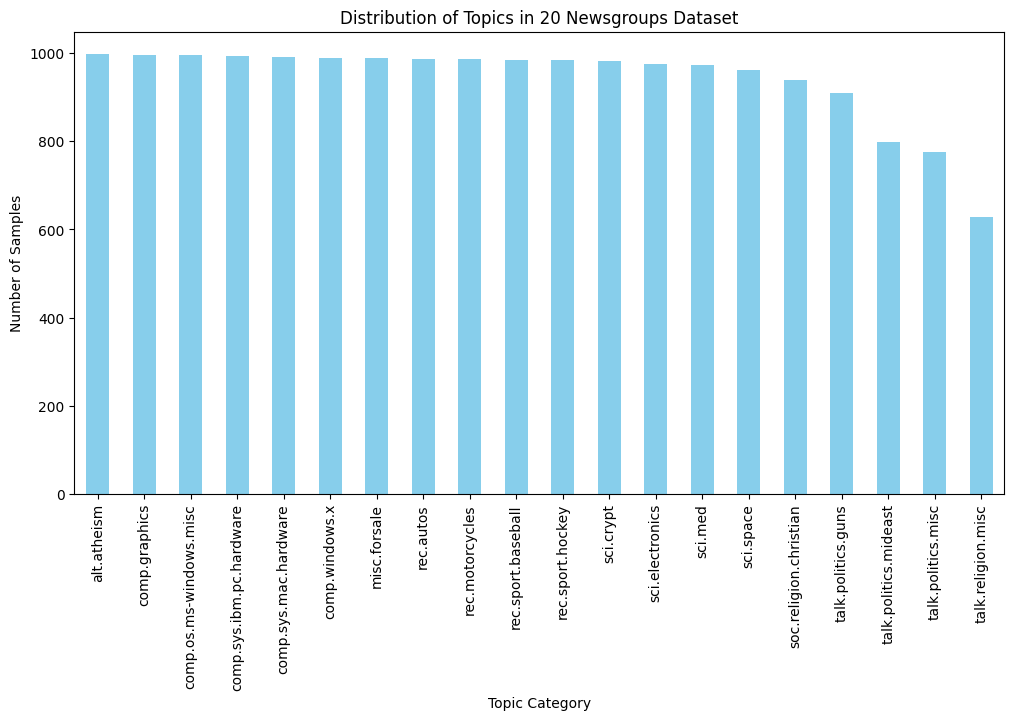

In [5]:
# Load the dataset for the distribution visualization
categories = newsgroups.target_names
labels_count = pd.Series(newsgroups.target).value_counts()

# Plot the distribution of topics
plt.figure(figsize=(12, 6))
labels_count.plot(kind='bar', color='skyblue')
plt.title('Distribution of Topics in 20 Newsgroups Dataset')
plt.xlabel('Topic Category')
plt.ylabel('Number of Samples')
plt.xticks(ticks=range(len(categories)), labels=categories, rotation=90)
plt.show()

In [6]:
category_descriptions = [
    "Atheism",
    "Computer graphics",
    "Microsoft Windows",
    "IBM PC hardware",
    "Apple Mac hardware",
    "X Window System",
    "Marketplace",
    "Cars",
    "Motorcycles",
    "Baseball",
    "Hockey",
    "Cryptography",
    "Electronic devices",
    "Medical discussions",
    "Outer space.",
    "Christianism",
    "Fire guns",
    "Middle East Politics",
    "General politics",
    "Religion"
]

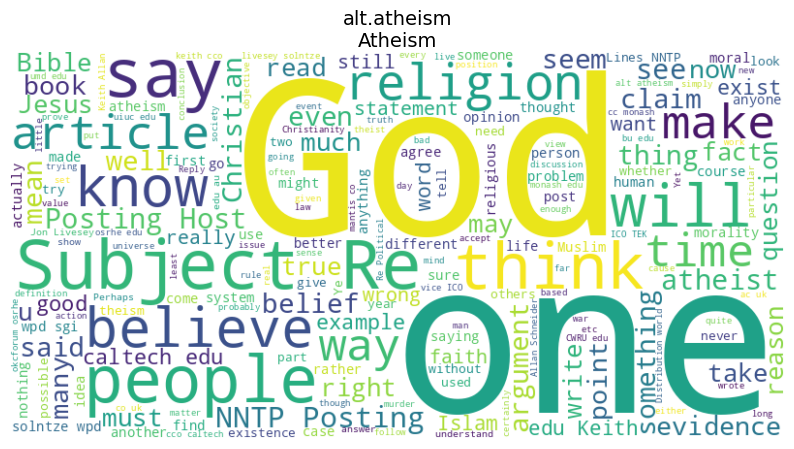

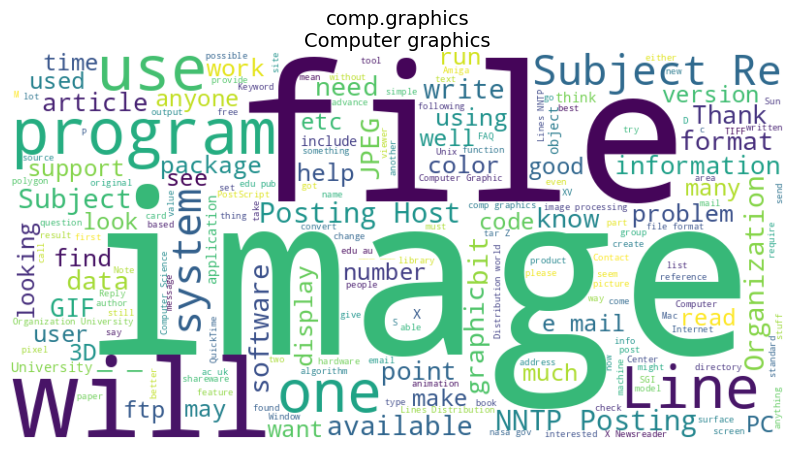

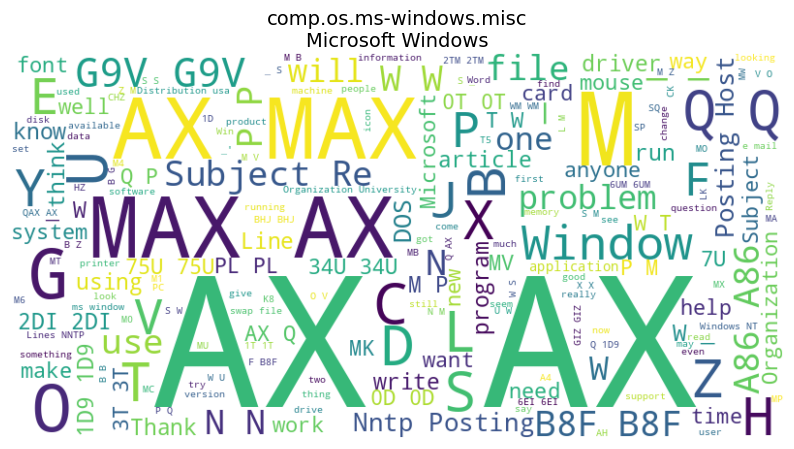

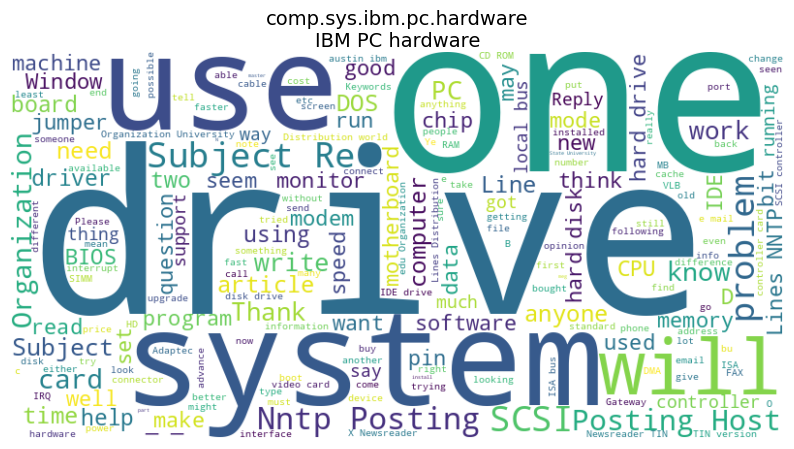

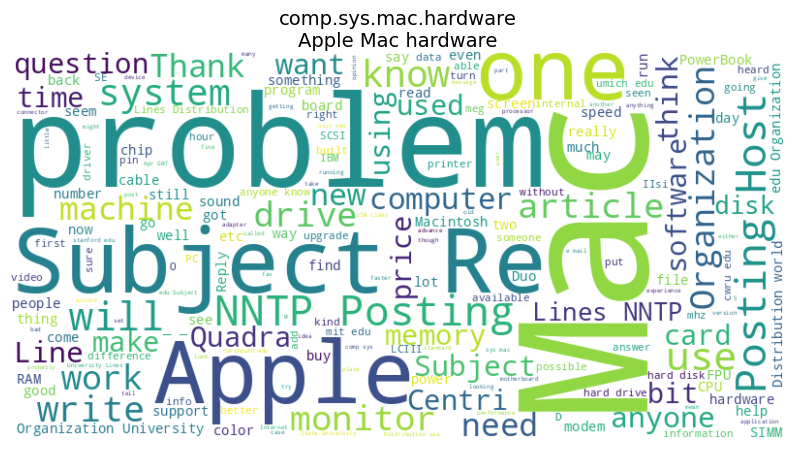

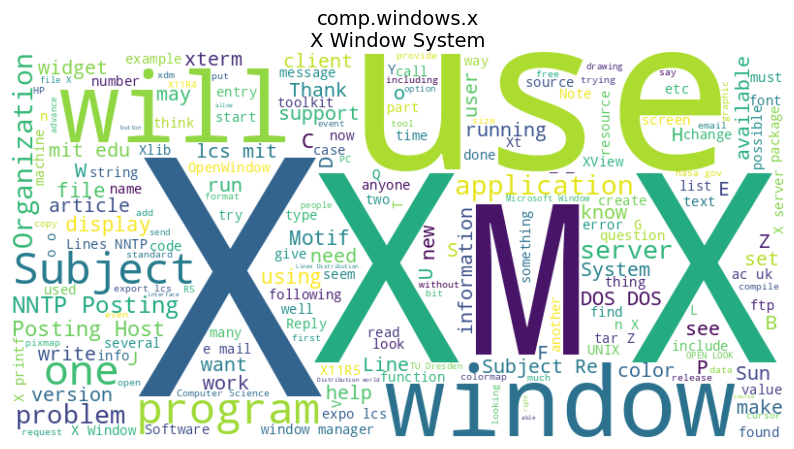

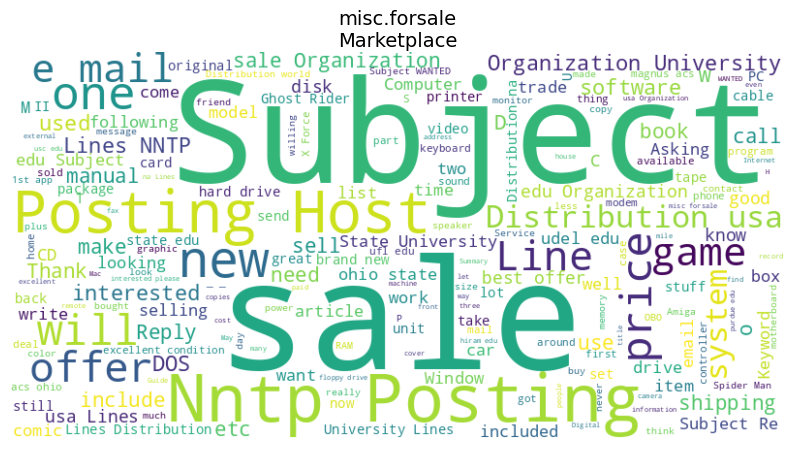

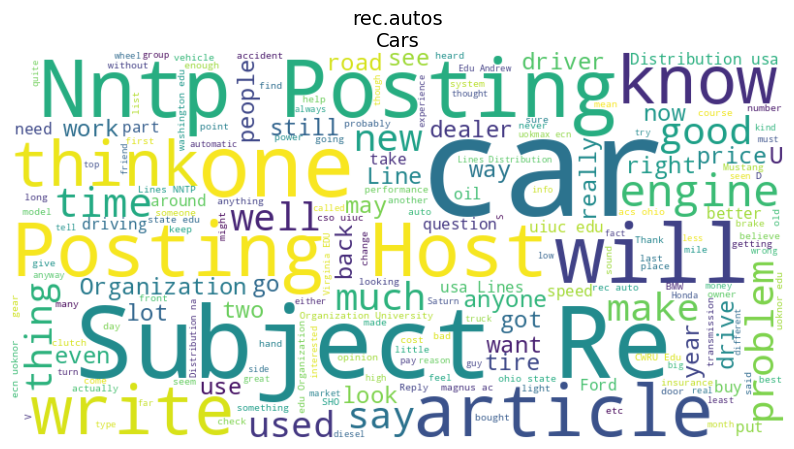

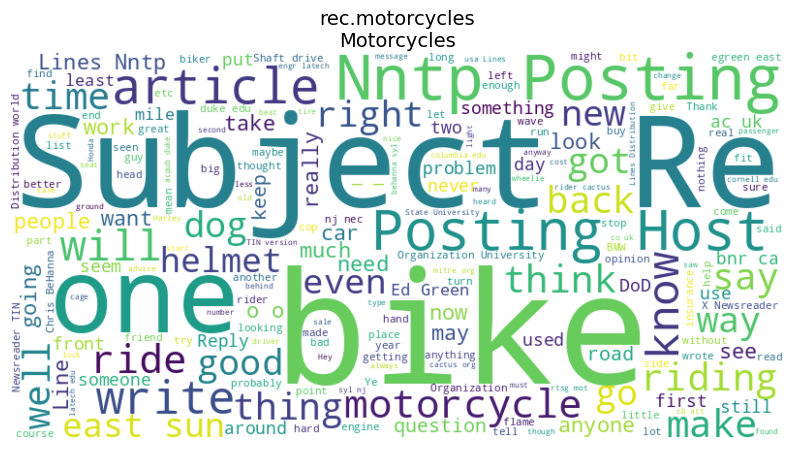

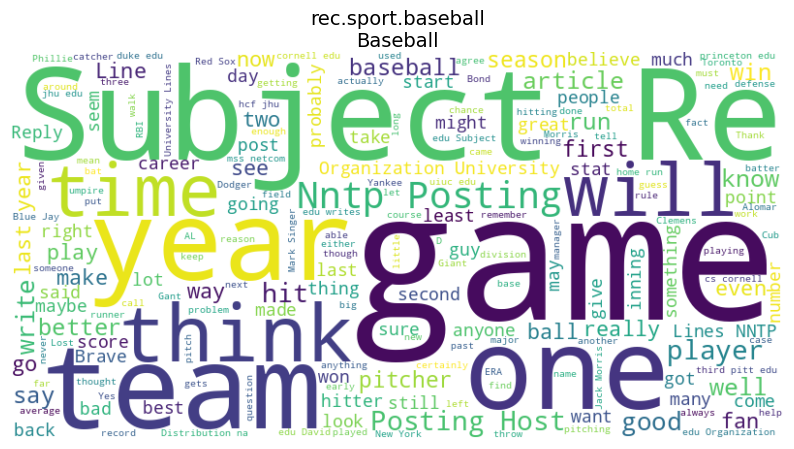

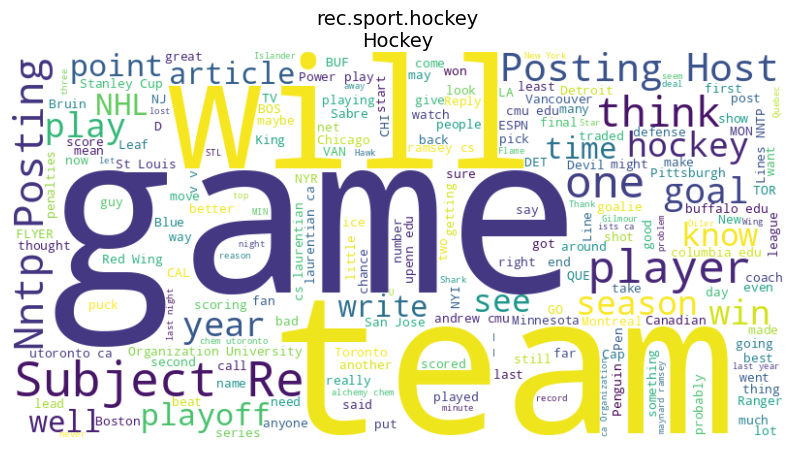

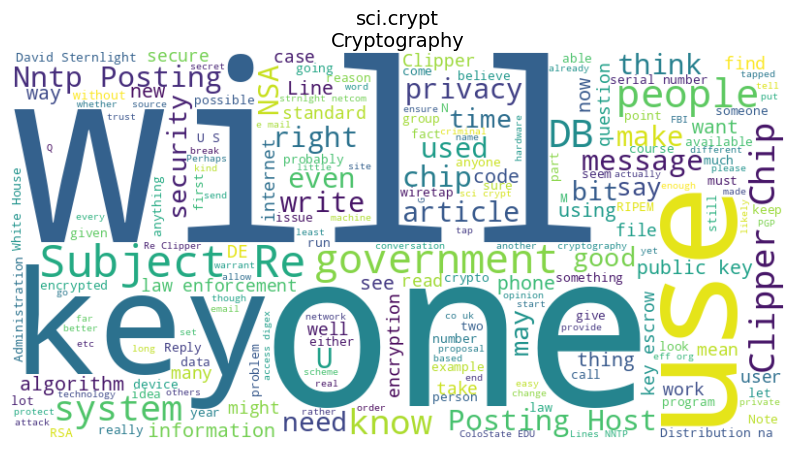

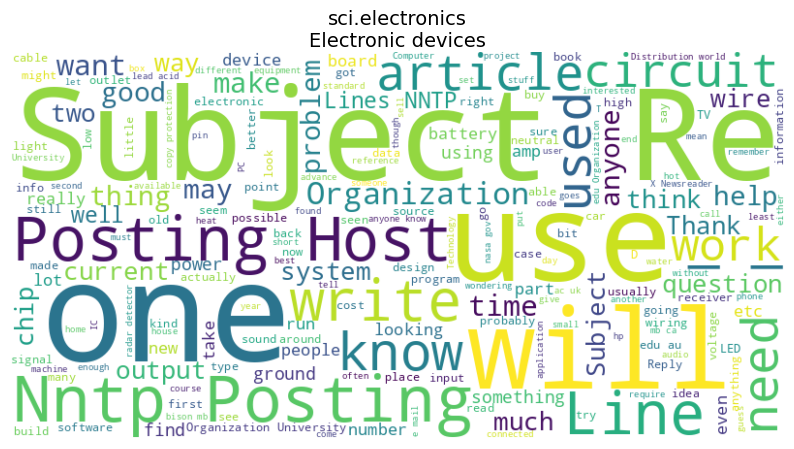

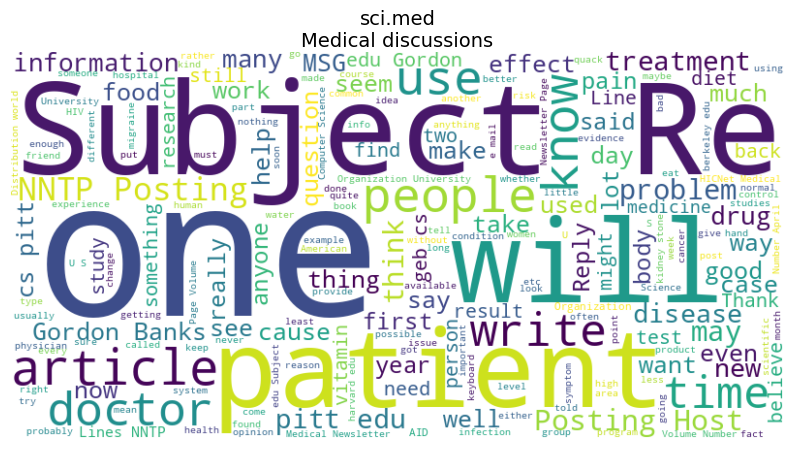

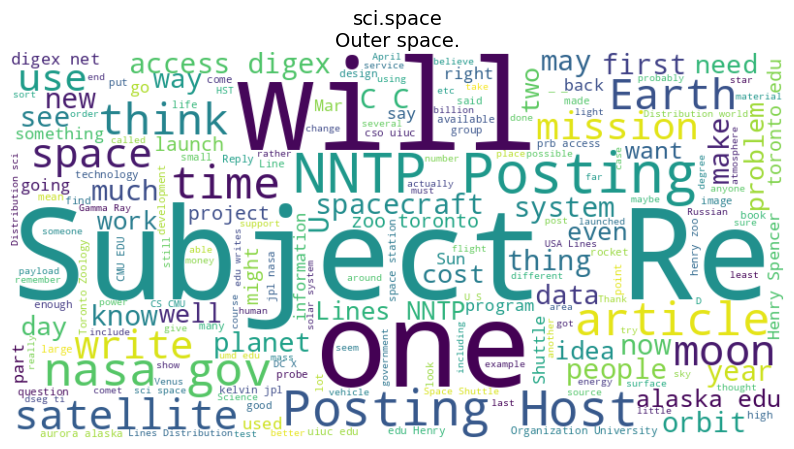

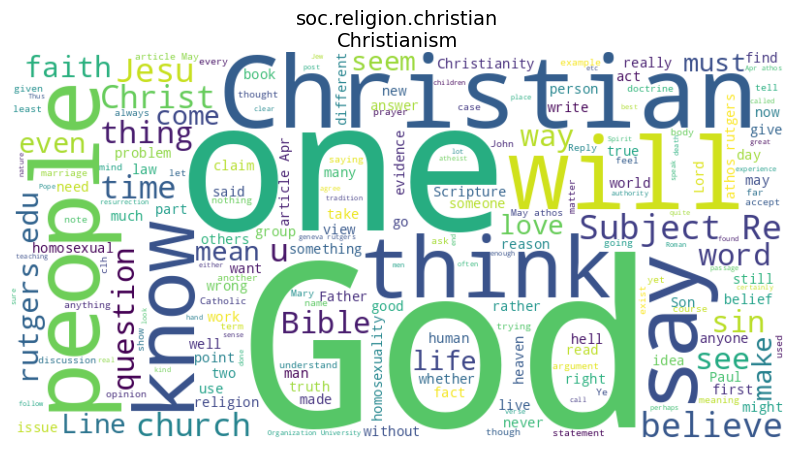

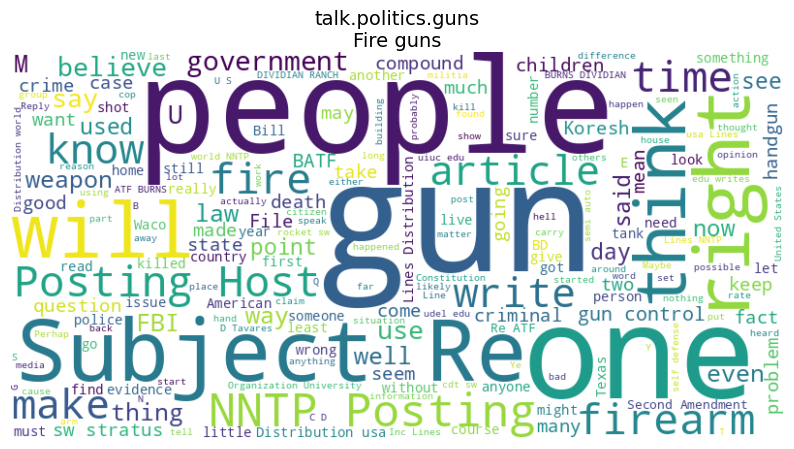

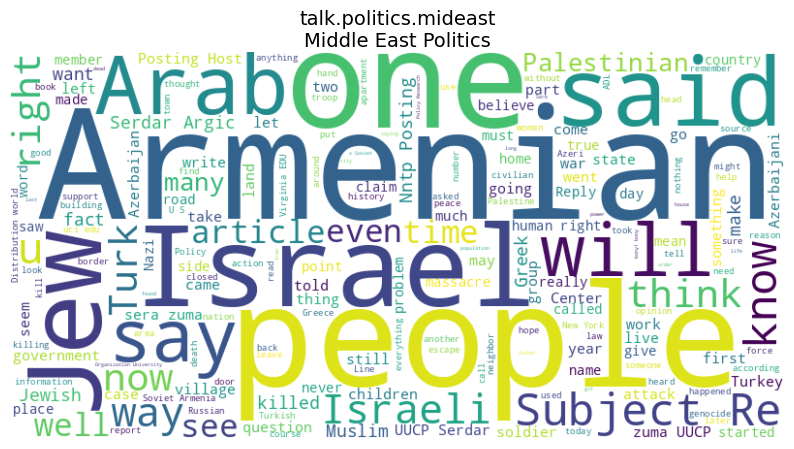

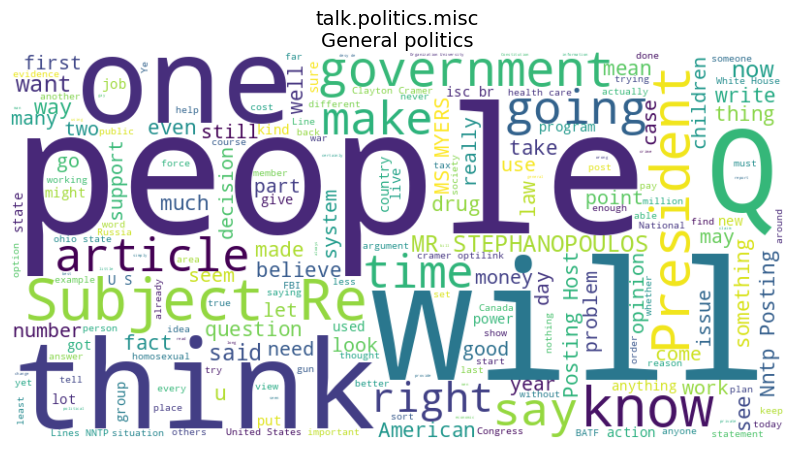

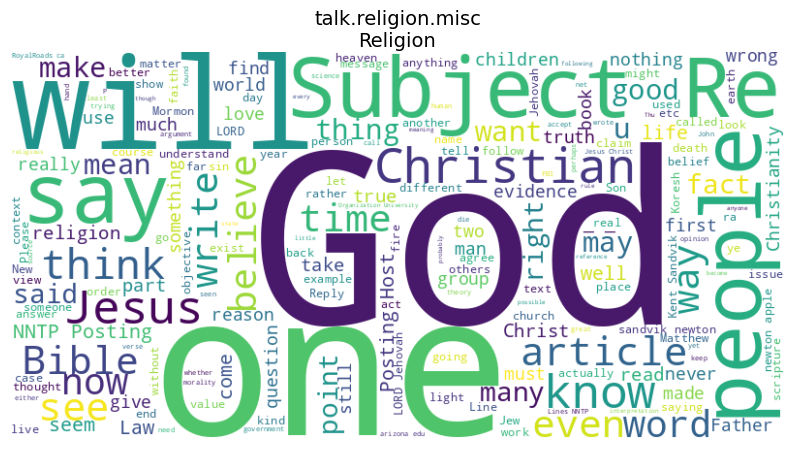

In [7]:
# Word Cloud
# References: Projects in NLP 1 (last semester)

from wordcloud import WordCloud

# Function to plot word cloud with category descriptions
def plot_word_cloud_with_description(topic_index):
    # Filter texts for the given topic index
    topic_texts = [text for i, text in enumerate(texts) if labels[i] == topic_index]
    topic_text = " ".join(topic_texts)

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(topic_text)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{categories[topic_index]}\n{category_descriptions[topic_index]}', fontsize=14, wrap=True)
    plt.axis('off')
    plt.show()

# Plot word clouds
for topic_index in range(20):
    plot_word_cloud_with_description(topic_index)



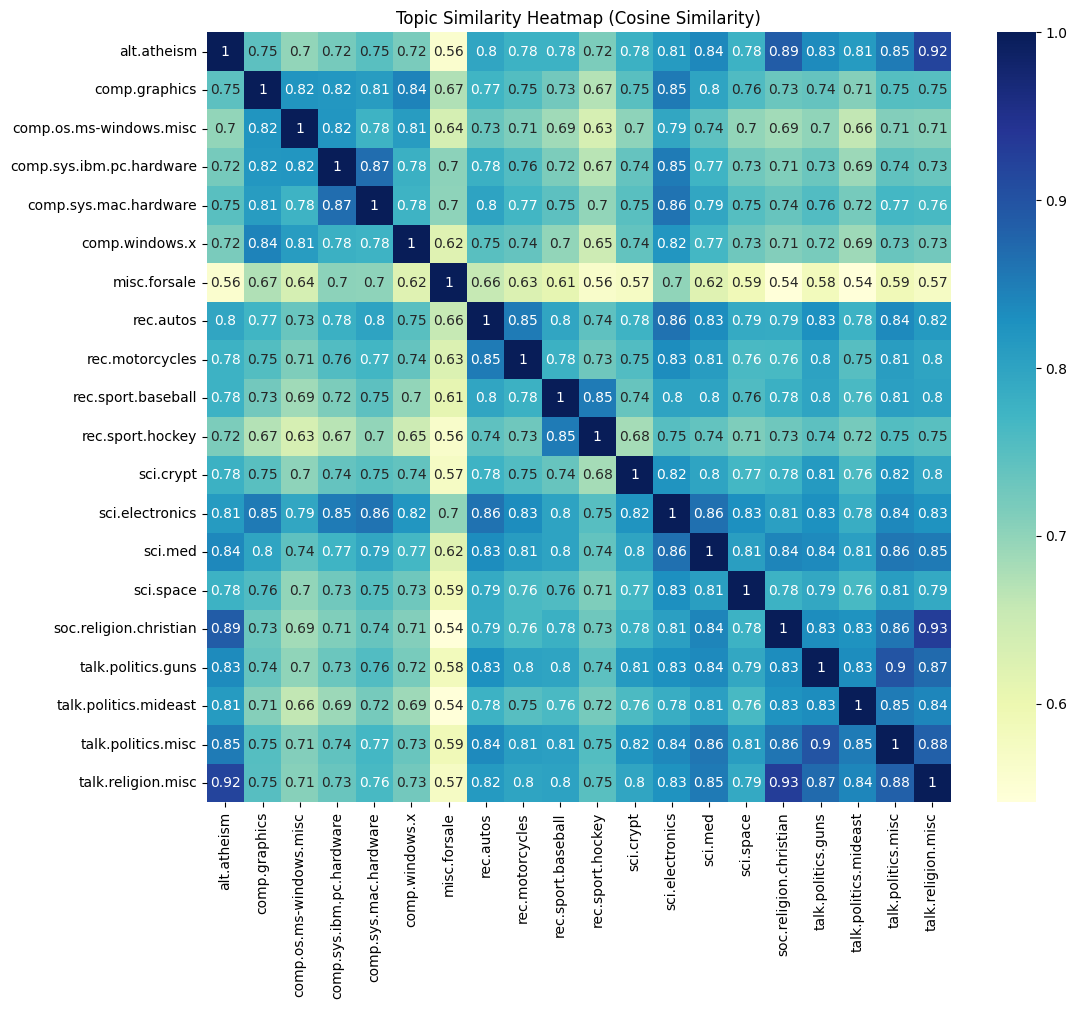

In [11]:
# Similarity between categories
# References: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html


from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

# Compute average TF-IDF vectors per topic
avg_vectors = []
for topic in range(len(categories)):
    topic_docs = X[labels == topic]
    avg_vector = topic_docs.mean(axis=0)
    avg_vectors.append(avg_vector)

# Calculate cosine similarity between topics
similarity_matrix = cosine_similarity(avg_vectors)

# Plot heatmap of topic similarity
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_matrix, xticklabels=categories, yticklabels=categories, cmap="YlGnBu", annot=True)
plt.title('Topic Similarity Heatmap (Cosine Similarity)')
plt.show()



## 3. Cleaning the Text Data

In [9]:
# Import necessary libraries
import spacy
import contractions
import pandas as pd
import re

# Load SpaCy's English model
nlp = spacy.load("en_core_web_sm")

# Sample data (replace with your actual dataset)
sample_texts = texts[:5]  # Using the first 5 samples for quick testing
comments_column = "sample_text"

# Creating a DataFrame for demonstration (replace this with your actual DataFrame)
df = pd.DataFrame(sample_texts, columns=[comments_column])

# Function for text preprocessing
# Code provided from NLP 1 Project #2 (last semester)
# Additional References: https://www.geeksforgeeks.org/nlp-expand-contractions-in-text-processing/

def text_cleaning(text):
    text = contractions.fix(text)  # Expand contractions to improve accuracy of lemmatization

    # Remove email addresses
    text = re.sub(r'\S+@\S+\.\S+', '', text)

    # Convert text to lowercase for consistency
    text = text.lower()

    # Process text with SpaCy
    doc = nlp(text)

    # Tokenize, remove stop words and punctuation, and lemmatize
    cleaned_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and len(token.lemma_) > 1]

    return ' '.join(cleaned_tokens)  # Join the cleaned tokens back into a single string

# Apply the cleaning function to the DataFrame column
df['cleaned_text_spacy'] = df[comments_column].apply(text_cleaning)

# Display the first few rows to verify the cleaning
print(df[['cleaned_text_spacy']].head())


                                  cleaned_text_spacy
0  bob pitas subject warn (please read keyword br...
1  ed chen subject window bmp sun raster article ...
2  subject sinus surgery septoplasty distribution...
3  distribution world organization bmug inc subje...
4  h.i.t hacker training subject need find number...


### Converting to Vectors

In [10]:
# References: https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(texts).toarray()  # Transform texts into TF-IDF vectors

# Convert labels to categorical format for multi-class classification
y = to_categorical(labels, num_classes=20)

In [12]:
# Clean the texts
cleaned_texts = [text_cleaning(text) for text in texts]

In [13]:
X = vectorizer.fit_transform(cleaned_texts).toarray()  # Transform cleaned texts into TF-IDF vectors

print("Sample TF-IDF Vector:\n", X[:5])  # Display first 5 rows of TF-IDF vectors
print("Corresponding Labels:\n", y[:5])  # Display first 5 labels


Sample TF-IDF Vector:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Corresponding Labels:
 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


### Split


In [14]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Check the shape of the resulting datasets
print("\nTraining data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)



Training data shape: (15076, 5000)
Testing data shape: (3770, 5000)
Training labels shape: (15076, 20)
Testing labels shape: (3770, 20)


## Observations:

While reviewing the dataset, I noticed some text samples included email addresses, which aren’t relevant for our analysis and could create noise. To clean this up, I added a step in the text_cleaning function to remove these addresses using a regular expression.

Other steps in the cleaning process include:

* Expanding contractions (like “don’t” to “do not”) to make the text more standardized.

* Lowercasing the text to avoid issues with case sensitivity.

* Using SpaCy to remove stop words, punctuation, and to lemmatize words. This helps focus on the important words in their base form, making the data more consistent.

These cleaning steps make the text data clearer and more focused, which should help improve model's performance.

## 4. Implementation of 3 Different Neural Networks



In [15]:
from tensorflow.keras.callbacks import EarlyStopping
# References: https://keras.io/api/callbacks/early_stopping/

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

optimizers = ['adam', 'sgd', 'rmsprop']

In [16]:
# Keep tracking of results

# Initialize a DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Optimizer', 'Loss', 'Accuracy'])



### Feedforward Neural Network (FFNN)

A simple feedforward neural network with two hidden layers using ReLU activation. The output layer has 20 units with a softmax activation for multi-class classification.

#### Optimizers: Adam, SGD, rmsprop

In [18]:
# Feedforward Neural Network (FFNN)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define FFNN model architecture
def build_ffnn():
    model = Sequential()
    model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(20, activation='softmax'))
    return model

# Train FFNN model with different optimizers
for optimizer in optimizers:
    print(f"\nTraining FFNN with {optimizer.upper()} optimizer:")
    ffnn_model = build_ffnn()
    ffnn_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    ffnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, callbacks=[early_stopping])

    # Evaluate and store FFNN results
    ffnn_loss, ffnn_accuracy = ffnn_model.evaluate(X_test, y_test, verbose=0)
    new_row = pd.DataFrame([{'Model': 'FFNN', 'Optimizer': optimizer, 'Loss': ffnn_loss, 'Accuracy': ffnn_accuracy}])
    results_df = pd.concat([results_df, new_row], ignore_index=True)

    print(f"FFNN with {optimizer.upper()} - Loss: {ffnn_loss:.4f}, Accuracy: {ffnn_accuracy:.4f}")





Training FFNN with ADAM optimizer:
Epoch 1/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2442 - loss: 2.5881 - val_accuracy: 0.8135 - val_loss: 0.8480
Epoch 2/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7230 - loss: 0.9650 - val_accuracy: 0.8594 - val_loss: 0.5120
Epoch 3/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8274 - loss: 0.5965 - val_accuracy: 0.8804 - val_loss: 0.4322


<ipython-input-18-337702c61ed6>:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


FFNN with ADAM - Loss: 0.8480, Accuracy: 0.8135

Training FFNN with SGD optimizer:
Epoch 1/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0609 - loss: 2.9938 - val_accuracy: 0.0875 - val_loss: 2.9905
Epoch 2/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0637 - loss: 2.9886 - val_accuracy: 0.1085 - val_loss: 2.9867
Epoch 3/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0687 - loss: 2.9835 - val_accuracy: 0.1313 - val_loss: 2.9822
FFNN with SGD - Loss: 2.9905, Accuracy: 0.0875

Training FFNN with RMSPROP optimizer:
Epoch 1/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.2032 - loss: 2.7534 - val_accuracy: 0.7647 - val_loss: 1.3129
Epoch 2/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6136 - loss: 1.3371 - val_accuracy: 0.8271 - val_loss: 0.6804
Epoch 3/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7532 - loss: 0.8404 - val_accuracy: 0.8507 - val_loss: 0.5248
FFNN with RMSPROP - Loss: 1.3129, Accuracy: 0.7647


### CNN Model

A neural network that utilizes convolutional layers to extract local patterns from text data, followed by pooling and dense layers.

#### Optimizers: Adam, SGD, rmsprop

In [19]:
# Function to build the CNN model

# Reference: General FFNN structure and optimizer used in class

def build_cnn():
    model = Sequential()
    model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(20, activation='softmax'))
    model.summary()
    return model

# Train CNN model with different optimizers
for optimizer in optimizers:
    print(f"\nTraining CNN with {optimizer.upper()} optimizer:")
    cnn_model = build_cnn()
    cnn_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, callbacks=[early_stopping])

    # Evaluate and store CNN results
    cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
    new_row = pd.DataFrame([{'Model': 'CNN', 'Optimizer': optimizer, 'Loss': cnn_loss, 'Accuracy': cnn_accuracy}])
    results_df = pd.concat([results_df, new_row], ignore_index=True)

    print(f"CNN with {optimizer.upper()} - Loss: {cnn_loss:.4f}, Accuracy: {cnn_accuracy:.4f}")


Training CNN with ADAM optimizer:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 128)                 │         640,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 20)                  │           1,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 649,684 (2.48 MB)

 Trainable params: 649,684 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.2530 - loss: 2.5669 - val_accuracy: 0.8202 - val_loss: 0.8182
Epoch 2/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7273 - loss: 0.9255 - val_accuracy: 0.8618 - val_loss: 0.5034
Epoch 3/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8277 - loss: 0.6095 - val_accuracy: 0.8769 - val_loss: 0.4146
CNN with ADAM - Loss: 0.8182, Accuracy: 0.8202

Training CNN with SGD optimizer:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 128)                 │         640,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 20)                  │           1,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 649,684 (2.48 MB)

 Trainable params: 649,684 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0544 - loss: 2.9955 - val_accuracy: 0.0663 - val_loss: 2.9918
Epoch 2/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0624 - loss: 2.9906 - val_accuracy: 0.0735 - val_loss: 2.9884
Epoch 3/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0665 - loss: 2.9867 - val_accuracy: 0.1058 - val_loss: 2.9848
CNN with SGD - Loss: 2.9918, Accuracy: 0.0663

Training CNN with RMSPROP optimizer:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 128)                 │         640,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 20)                  │           1,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 649,684 (2.48 MB)

 Trainable params: 649,684 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1935 - loss: 2.7498 - val_accuracy: 0.7363 - val_loss: 1.3114
Epoch 2/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6024 - loss: 1.3208 - val_accuracy: 0.8127 - val_loss: 0.7315
Epoch 3/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7425 - loss: 0.8541 - val_accuracy: 0.8385 - val_loss: 0.5605
CNN with RMSPROP - Loss: 1.3114, Accuracy: 0.7363


### RNN Model



In [20]:
# Function to build the RNN model
# References:https://keras.io/api/layers/reshaping_layers/reshape/
# https://saturncloud.io/blog/how-to-add-new-rows-to-a-pandas-dataframe

from tensorflow.keras.layers import SimpleRNN, Reshape

def build_rnn():
    model = Sequential()
    model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))  # Dense layer for TF-IDF input
    model.add(Reshape((1, 128)))  # Reshape to add time dimension
    model.add(SimpleRNN(64, return_sequences=False))  # Simple RNN layer
    model.add(Dropout(0.5))
    model.add(Dense(20, activation='softmax'))  # Output layer

    return model


# Train the Simple RNN model


for optimizer in optimizers:
    print(f"\nTraining RNN with {optimizer.upper()} optimizer:")
    rnn_model = build_rnn()
    rnn_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    rnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, callbacks=[early_stopping])

    # Evaluate and store RNN results
    rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test, y_test, verbose=0)
    new_row = pd.DataFrame([{'Model': 'RNN', 'Optimizer': optimizer, 'Loss': rnn_loss, 'Accuracy': rnn_accuracy}])
    results_df = pd.concat([results_df, new_row], ignore_index=True)

    print(f"RNN with {optimizer.upper()} - Loss: {rnn_loss:.4f}, Accuracy: {rnn_accuracy:.4f}")





Training RNN with ADAM optimizer:


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 128)                 │         640,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 20)                  │           1,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 653,780 (2.49 MB)

 Trainable params: 653,780 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4746 - loss: 2.1629 - val_accuracy: 0.8647 - val_loss: 0.5355
Epoch 2/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9034 - loss: 0.3941 - val_accuracy: 0.8862 - val_loss: 0.4104
Epoch 3/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9561 - loss: 0.1930 - val_accuracy: 0.8918 - val_loss: 0.3829
Epoch 4/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9772 - loss: 0.1107 - val_accuracy: 0.8915 - val_loss: 0.3873
Epoch 5/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9877 - loss: 0.0651 - val_accuracy: 0.8878 - val_loss: 0.4117
Epoch 6/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9945 - loss: 0.0412 - val_accuracy: 0.8889 - val_loss: 0.4336
RNN with ADAM - Loss: 0.3829, Accuracy: 0.8918

Training RNN with SGD optimizer:


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                     │ (None, 128)                 │         640,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 20)                  │           1,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 653,780 (2.49 MB)

 Trainable params: 653,780 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0577 - loss: 2.9930 - val_accuracy: 0.0637 - val_loss: 2.9886
Epoch 2/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0744 - loss: 2.9820 - val_accuracy: 0.1037 - val_loss: 2.9789
Epoch 3/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0959 - loss: 2.9720 - val_accuracy: 0.1602 - val_loss: 2.9669
RNN with SGD - Loss: 2.9886, Accuracy: 0.0637

Training RNN with RMSPROP optimizer:


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 128)                 │         640,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_2 (Reshape)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 20)                  │           1,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 653,780 (2.49 MB)

 Trainable params: 653,780 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4325 - loss: 2.3346 - val_accuracy: 0.8369 - val_loss: 0.6989
Epoch 2/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8538 - loss: 0.5813 - val_accuracy: 0.8700 - val_loss: 0.4520
Epoch 3/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9087 - loss: 0.3421 - val_accuracy: 0.8830 - val_loss: 0.4012
RNN with RMSPROP - Loss: 0.6989, Accuracy: 0.8369


## 5. Comparison of the Results of Different Approaches


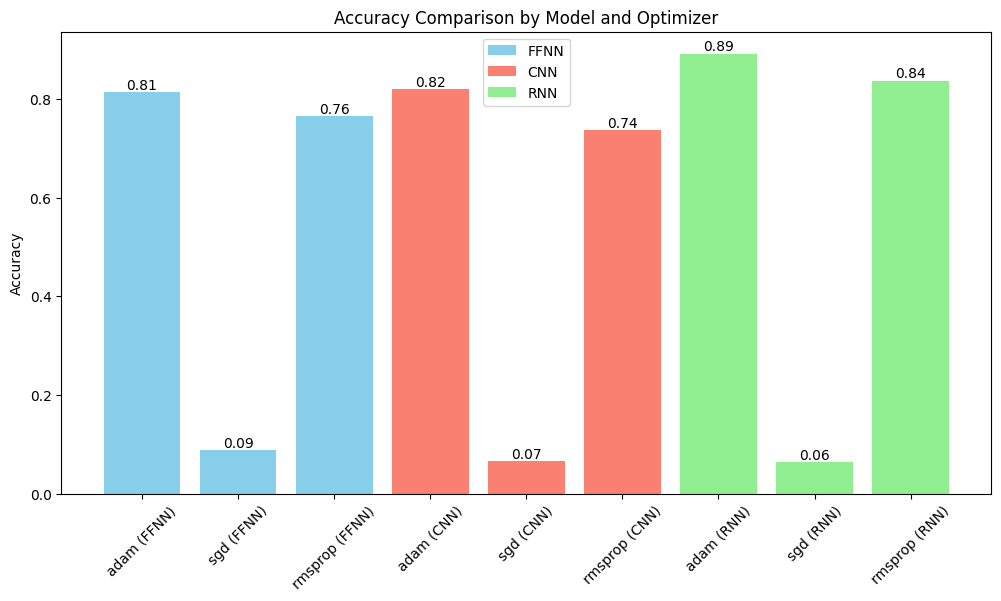

In [22]:
# Filter results for each model
ffnn_results = results_df[results_df['Model'] == 'FFNN']
cnn_results = results_df[results_df['Model'] == 'CNN']
rnn_results = results_df[results_df['Model'] == 'RNN']

# Plotting Accuracy for each model
plt.figure(figsize=(12, 6))

# Plot FFNN
bars_ffnn = plt.bar(ffnn_results['Optimizer'] + ' (FFNN)', ffnn_results['Accuracy'], color='skyblue', label='FFNN')
# Plot CNN
bars_cnn = plt.bar(cnn_results['Optimizer'] + ' (CNN)', cnn_results['Accuracy'], color='salmon', label='CNN')
# Plot RNN
bars_rnn = plt.bar(rnn_results['Optimizer'] + ' (RNN)', rnn_results['Accuracy'], color='lightgreen', label='RNN')

# Adding accuracy labels on top of each bar
for bars in [bars_ffnn, bars_cnn, bars_rnn]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

# Customize plot
plt.title('Accuracy Comparison by Model and Optimizer')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.show()

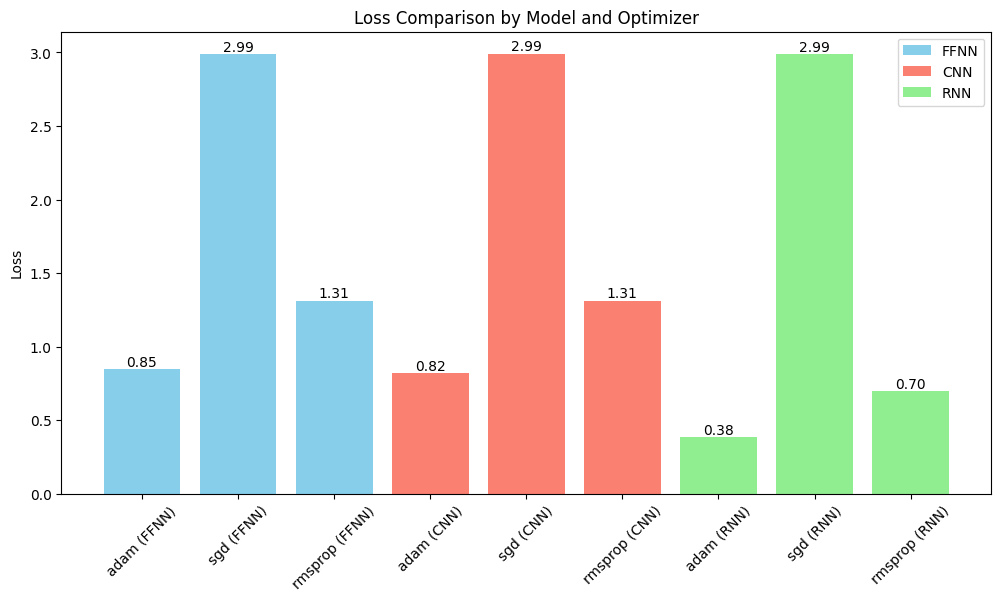

In [24]:
# Plotting Loss for each model
# References: https://how2matplotlib.com/how-to-annotate-bars-in-barplot-with-matplotlib.html


plt.figure(figsize=(12, 6))

# Plot FFNN Loss
bars_ffnn_loss = plt.bar(ffnn_results['Optimizer'] + ' (FFNN)', ffnn_results['Loss'], color='skyblue', label='FFNN')
# Plot CNN Loss
bars_cnn_loss = plt.bar(cnn_results['Optimizer'] + ' (CNN)', cnn_results['Loss'], color='salmon', label='CNN')
# Plot RNN Loss
bars_rnn_loss = plt.bar(rnn_results['Optimizer'] + ' (RNN)', rnn_results['Loss'], color='lightgreen', label='RNN')

# Adding loss labels on top of each bar
for bars in [bars_ffnn_loss, bars_cnn_loss, bars_rnn_loss]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

# Customize plot for loss
plt.title('Loss Comparison by Model and Optimizer')
plt.ylabel('Loss')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## 6. Report and Description of Work Done

### 6.1 Report of Performance

The analysis of the models with different optimizers shows clear patterns in performance. For the *Feedforward Neural Network (FFNN)*, the **Adam optimizer worked well, achieving an accuracy of 0.81 and a low loss of 0.85.** This indicates a good fit. However, the **Stochastic Gradient Descent (SGD) optimizer struggled, with low accuracy (0.09) and high loss (2.99)**, suggesting it doesn’t work well with FFNN. **RMSprop did reasonably well, with an accuracy of 0.76 and a loss of 1.31**, performing better than SGD but not as well as Adam.



The *Convolutional Neural Network (CNN)* showed similar results. **Adam performed strongly, with an accuracy of 0.82 and a low loss of 0.82**, indicating it managed errors effectively. On the other hand, **SGD once again had poor results, with an accuracy of 0.07 and a loss of 2.99**. This shows that SGD isn’t a good choice for CNN either. **RMSprop was fairly effective with CNN, giving an accuracy of 0.74 and a loss of 1.31**, which is decent but still not as good as Adam.

The *Recurrent Neural Network (RNN)* had the highest performance with the **Adam optimizer, achieving an accuracy of 0.89 and a low loss of 0.38**, which points to an excellent fit. Meanwhile, **SGD continued to underperform with a low accuracy of 0.06 and a high loss of 2.99**. **RMSprop, however, did well with the RNN, reaching an accuracy of 0.84 and a loss of 0.70**. While not quite as strong as Adam, it still shows good results.



In summary, **Adam was the best optimizer across all models**, providing high accuracy and low loss. RMSprop was a solid alternative, especially with CNN and RNN. In contrast, SGD consistently performed poorly, making it the least effective option for these models.

### 6.2 Description of Work Done

In this project, I evaluated three different neural network models—Feedforward Neural Network (FFNN), Convolutional Neural Network (CNN), and Recurrent Neural Network (RNN)—using three optimizers: Adam, SGD, and RMSprop. The goal was to assess the performance of each model-optimizer combination based on accuracy and loss metrics.

Initially, I implemented an FFNN alongside GRU and LSTM networks. While the FFNN performed well, GRU and LSTM did not yield satisfactory results despite adjustments to configurations and optimizers. At this point, I reached out to my professor for guidance. My professor provided valuable feedback, asking if I had converted text to numerical vectors before feeding them into the neural networks. He pointed out that, if the text had already been vectorized, using an embedding layer in GRU, LSTM, and CNN was unnecessary. He also suggested that I examine model.summary() for each configuration to compare parameter counts and understand how these differences might impact performance.

Following this advice, I removed the embedding layers from GRU and LSTM and closely examined the updated models. Despite these adjustments, GRU and LSTM still did not perform as expected, so I opted to replace them with CNN and RNN models. Each model was retrained with the Adam, SGD, and RMSprop optimizers, then evaluated based on accuracy and loss on a test dataset. The results were systematically recorded in a DataFrame for easy comparison and visualization.

I generated bar plots to visually compare the performance of each model-optimizer combination. The first plot illustrated accuracy, while the second displayed loss, with each bar labeled to enhance clarity. This analysis revealed that the Adam optimizer consistently provided the best results across all models, with high accuracy and low loss. RMSprop was also a viable alternative, especially for CNN and RNN, where it achieved respectable performance. On the other hand, the SGD optimizer consistently underperformed, suggesting it was not well-suited for these configurations.

This process underscored the importance of both model architecture and optimizer selection in neural network training. The feedback from my professor was instrumental in refining the approach, leading to more accurate model comparisons and deeper insights into optimizing neural network performance for this specific context.